<a href="https://colab.research.google.com/github/RexGod/DataMining_Pgu_Nueral_Network/blob/main/finalDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import tensorflow as tf

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [137]:
pathImages = '/content/drive/MyDrive/tits_pic'

In [138]:
pathManual = '/content/drive/MyDrive/Radiology_manual_annotations.xlsx'
manualRadio = pd.read_excel(pathManual)

In [139]:
manualRadio= manualRadio.rename(columns={'Pathology Classification/ Follow up':'classification'})

In [140]:
manualRadio = manualRadio[manualRadio['Type']=='CESM']

In [141]:
import os
images = os.listdir(pathImages)
loaded_images = []
#filename_txt = []
for filename in images:
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_list = os.path.join(pathImages, filename)
        loaded_images.append(image_list)
        #filename_txt.append(filename)

In [142]:
loaded_images = sorted(loaded_images, key=lambda x: x.lower())

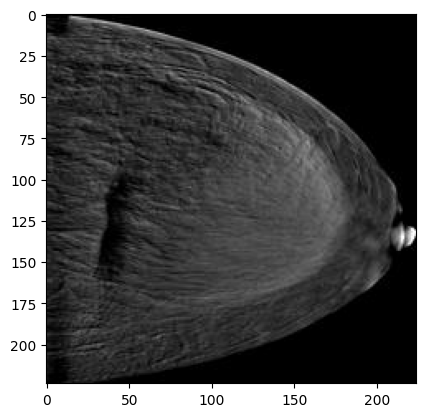

In [143]:
img1 = plt.imread(loaded_images[0])
plt.imshow(img1)

In [144]:
loaded_image = []
for image_path in loaded_images:
    image = plt.imread(image_path)
    loaded_image.append(image)

In [145]:
manualRadio = manualRadio.sort_values(by=['Image_name'])

In [146]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
556,P100_L_CM_CC,100,L,CESM,61,_,2,Non enhancement,CC,postoperative,1,Benign
557,P100_L_CM_MLO,100,L,CESM,61,_,2,Non enhancement,MLO,postoperative,1,Benign
552,P100_R_CM_CC,100,R,CESM,61,_,1,No mass or non mass enhancement,CC,normal,1,Normal
553,P100_R_CM_MLO,100,R,CESM,61,_,1,No mass or non mass enhancement,MLO,normal,1,Normal
564,P101_L_CM_CC,101,L,CESM,47,_,1,No mass or non mass enhancement,CC,normal,1,Normal


In [147]:
validation_data_size = int(len(loaded_image)*0.12)
test_data_size = int(len(loaded_image)*0.13)

In [148]:
random_select = np.random.choice(len(loaded_image), size=validation_data_size, replace=False)

In [149]:
print(random_select)

[381 808 578 411 358 367 738  33 633 902 983 331 474  59 183 354 352 416
 664 108 667 242 543 597 634 151 382 303 517 463 660 994 606  56 241 941
 176 653 643 234 754 855 877 289 663 238 845 954 571 838 190 383 769 911
 283 796 415 290 421 910  81 611 622  14 963 840 525 105 180 189 596 378
 887 210 215 726 621 115 818 509 582 929 325  63 678 224 748 562 478  52
 247 944 187 980 882 631 712 350 888 396 319 491 200 563 710 453 661  26
 316 196 725 148 903 240 614 856 518 896 515 700]


In [150]:
validation_data_x = np.array(loaded_image)[random_select]
validation_data_y = manualRadio.iloc[random_select]
loaded_image = np.delete(loaded_image, random_select, axis=0)
manualRadio=manualRadio.drop(manualRadio.index[random_select])

In [151]:
random_select = np.random.choice(len(loaded_image), size=test_data_size, replace=False)

In [152]:
test_data_x = np.array(loaded_image)[random_select]
test_data_y = manualRadio.iloc[random_select]
loaded_image = np.delete(loaded_image, random_select, axis=0)
manualRadio=manualRadio.drop(manualRadio.index[random_select])

In [153]:
train_data_x = np.array(loaded_image)
train_data_y = manualRadio[["Image_name" , "classification"]]

In [154]:
import tensorflow as tf
import keras

In [155]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
556,P100_L_CM_CC,100,L,CESM,61,_,2,Non enhancement,CC,postoperative,1,Benign
557,P100_L_CM_MLO,100,L,CESM,61,_,2,Non enhancement,MLO,postoperative,1,Benign
552,P100_R_CM_CC,100,R,CESM,61,_,1,No mass or non mass enhancement,CC,normal,1,Normal
553,P100_R_CM_MLO,100,R,CESM,61,_,1,No mass or non mass enhancement,MLO,normal,1,Normal
564,P101_L_CM_CC,101,L,CESM,47,_,1,No mass or non mass enhancement,CC,normal,1,Normal


In [156]:
label_mapping = {'Benign': 0, 'Normal': 1, 'Malignant': 2}

In [157]:
integer_labels = train_data_y['classification'].map(label_mapping)
integer_labels_valid = validation_data_y['classification'].map(label_mapping)
y_train_to_categorical = keras.utils.to_categorical(integer_labels, num_classes=len(label_mapping), dtype='float32')
y_validation_to_categorical = keras.utils.to_categorical(integer_labels_valid, num_classes=len(label_mapping), dtype='float32')

In [158]:
from tensorflow.keras.applications.resnet import ResNet101,ResNet152 , preprocess_input , decode_predictions

In [159]:
#train_images_rgb = np.repeat(train_data_x[..., np.newaxis], 3, -1)[..., 0]
#test_images_rgb = np.repeat(test_data_x[..., np.newaxis], 3, -1)
#validation_images_rgb = np.repeat(validation_data_x[..., np.newaxis], 3, -1)[..., 0]


In [160]:
train_data_x = train_data_x/255
validation_data_x = validation_data_x/255

In [161]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D , Conv2D , Flatten , Dropout , MaxPooling2D , BatchNormalization
from keras import layers
from tensorflow.keras.optimizers import Adam,Adamax,SGD


In [163]:
model = Sequential()

In [164]:
model.add(base_model)

In [165]:
for layer in base_model.layers:
    layer.trainable = True

for layer in base_model.layers[:-7]:
    layer.trainable = False

In [166]:
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [167]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate the image by a random angle between -20 and 20 degrees
    width_shift_range=0.1,  # Shift the image horizontally by a fraction of its width
    height_shift_range=0.1,  # Shift the image vertically by a fraction of its height
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Apply zoom transformation
    horizontal_flip=True,  # Flip the image horizontally
    vertical_flip=False,  # Do not flip the image vertically
    fill_mode='nearest'  # Fill any empty pixels created during the augmentation process
)

In [168]:
train_generator = datagen.flow(train_data_x, y_train_to_categorical, batch_size=32)

In [169]:
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [170]:
from tensorflow.keras.callbacks import EarlyStopping

In [171]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True ,)

In [172]:
nemudar = model.fit(train_generator,
                    validation_data=(validation_data_x,y_validation_to_categorical ),
                    epochs=50,
                    callbacks = [early_stopping]
                    )


Epoch 1/50
24/24 [==============================] - 27s 652ms/step - loss: 1.5999 - accuracy: 0.3440 - val_loss: 1.2283 - val_accuracy: 0.2167
Epoch 2/50
24/24 [==============================] - 13s 528ms/step - loss: 1.4672 - accuracy: 0.3479 - val_loss: 1.1049 - val_accuracy: 0.3750
Epoch 3/50
24/24 [==============================] - 11s 471ms/step - loss: 1.3320 - accuracy: 0.3772 - val_loss: 1.1592 - val_accuracy: 0.4083
Epoch 4/50
24/24 [==============================] - 13s 531ms/step - loss: 1.3220 - accuracy: 0.4050 - val_loss: 1.0884 - val_accuracy: 0.3750
Epoch 5/50
24/24 [==============================] - 12s 515ms/step - loss: 1.2936 - accuracy: 0.4077 - val_loss: 1.0694 - val_accuracy: 0.3750
Epoch 6/50
24/24 [==============================] - 12s 481ms/step - loss: 1.2140 - accuracy: 0.4436 - val_loss: 1.0449 - val_accuracy: 0.3750
Epoch 7/50
24/24 [==============================] - 13s 526ms/step - loss: 1.2697 - accuracy: 0.4157 - val_loss: 1.0194 - val_accuracy: 0.3750

Text(0.5, 1.0, 'val_loss')

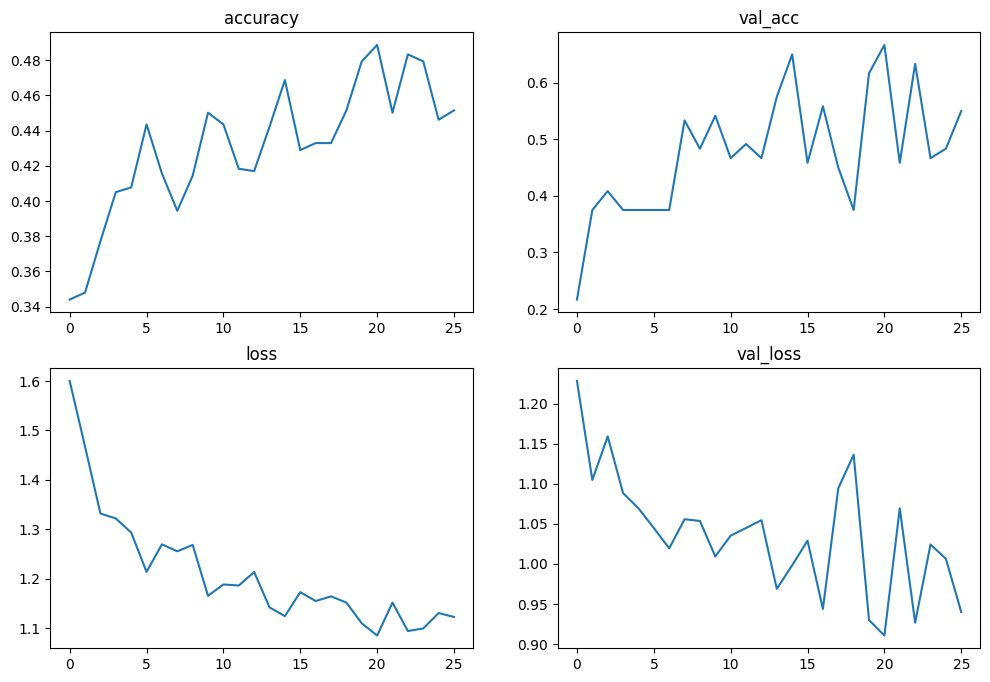

In [173]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(nemudar.history['accuracy'])
plt.title('accuracy')
plt.subplot(2,2,2)
plt.plot(nemudar.history['val_accuracy'])
plt.title('val_acc')
plt.subplot(2,2,3)
plt.plot(nemudar.history['loss'])
plt.title('loss')
plt.subplot(2,2,4)
plt.plot(nemudar.history['val_loss'])
plt.title('val_loss')

In [177]:
model.save('/content/drive/MyDrive/ResNet152new.h5')

In [178]:
Resmodel = tf.keras.models.load_model('/content/drive/MyDrive/ResNet152new.h5')

In [179]:
test_data_x = test_data_x/255

In [180]:
predictions = model.predict(test_data_x)

predicted_labels = np.argmax(predictions, axis=1)

5/5 [==============================] - 4s 236ms/step


In [181]:
print(predicted_labels)

[1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2
 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 2 1 1
 2 2 2 1 1 1 2 1 1 2 1 2 2 2 1 1 2 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2
 2 1 2 1 1 1 2 2 2 1 2 1 2 2 1 2 1 1 1]


In [182]:
integer_labels_test = test_data_y['classification'].map(label_mapping)

y_test_to_categorical = keras.utils.to_categorical(integer_labels, num_classes=len(label_mapping), dtype='float32')


In [183]:
print(y_test_to_categorical)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
